In [212]:
import numpy as np
import matplotlib.pyplot as plt

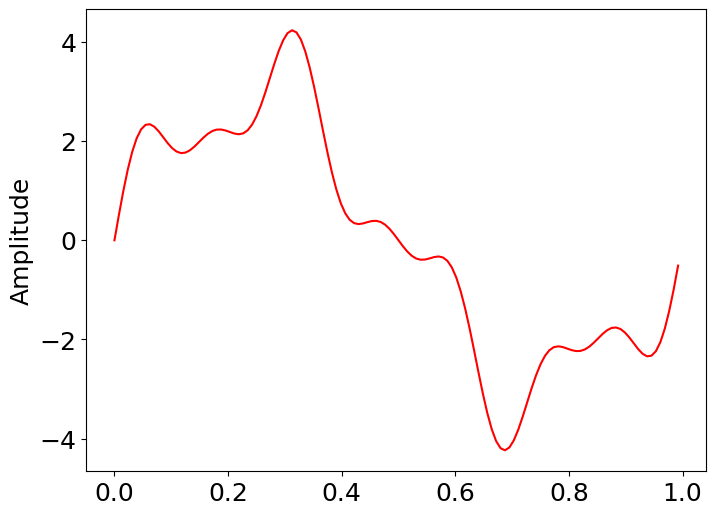

In [213]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# creating the sample with the combination of 3 sin functions with different frequency

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

#ploting the sample signal 
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [214]:
def FFT(x):
    """
    A recursive implementation of the 1D Cooley-Tukey FFT.
    The input should have a length that is a power of 2.
    
    Parameters:
    x (array_like): Input signal of length that is a power of 2.

    Returns:
    X (array): Fourier Transform of the input signal.
    """

    # Get the length of the input signal
    N = len(x)
    
    # Base case: if the length of the input signal is 1, return the signal itself
    if N == 1:
        return x
    else:
        # Divide the input signal into even and odd indices and recursively compute FFT for each
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        
        # Calculate the factors for the butterfly operations
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        # Combine the results of the even and odd indices using the butterfly operations
        X = np.concatenate([X_even + factor[:int(N/2)] * X_odd, X_even + factor[int(N/2):] * X_odd])
        
        return X

        
        

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

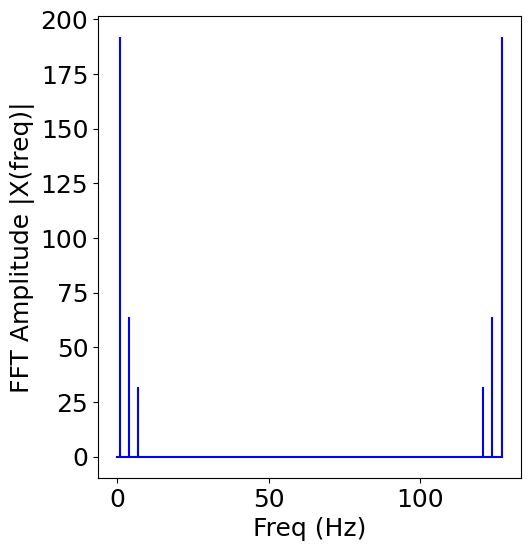

In [215]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

# ploting the PSD of the given signal using FFT application
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

In [216]:
def DFT(x):
    """
    Function to calculate the discrete Fourier Transform (DFT)
    of a 1D real-valued signal x.

    Parameters:
    x (array_like): Input signal.

    Returns:
    X (array): DFT coefficients of the input signal.
    """

    # Get the length of the input signal
    N = len(x)
    # Generate an array containing integers from 0 to N-1
    n = np.arange(N)
    # Reshape 'n' to a 2D array with N rows and 1 column
    k = n.reshape((N, 1))
    # Compute the exponential term representing the basis functions of the DFT
    e = np.exp(-2j * np.pi * k * n / N)
    # Compute the DFT coefficients by performing matrix multiplication
    X = np.dot(e, x)
    
    # Return the DFT coefficients
    return X

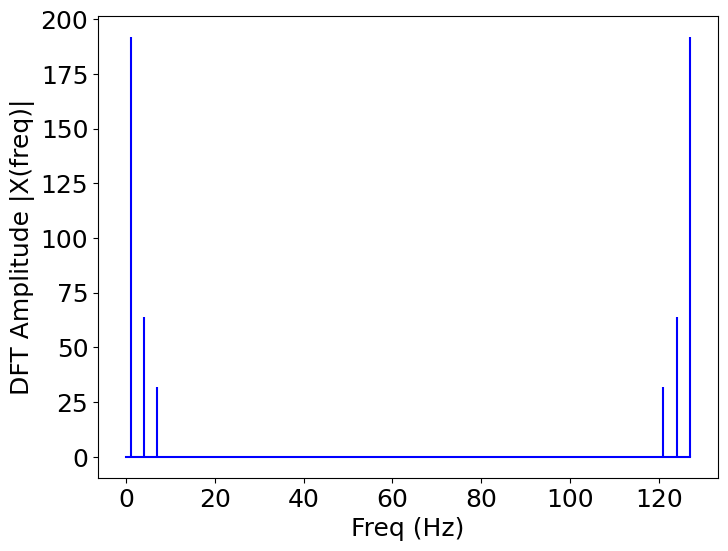

In [217]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

# ploting the PSD of the given signal using DFT application
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [218]:
# utility function to extend an array until its length is a power of two
def extend_array_to_lowest_power_of_two(array):
    size_of_array = len(array)  # size of array
    required_size = 1           # variable to count the required size

    while(required_size < size_of_array):   # loop that increases the required size until it exceeds the array
        required_size *= 2

    for i in range(required_size - size_of_array):  # the new array is filled with zeroes
        array = np.append(array,0)
    print(len(array))
    return array

In [219]:
def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    dt = 1/num_samples
    t = np.arange(0, 1, dt)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal , clean_signal,t

In [220]:
# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1024  # Number of samples in the sine wave

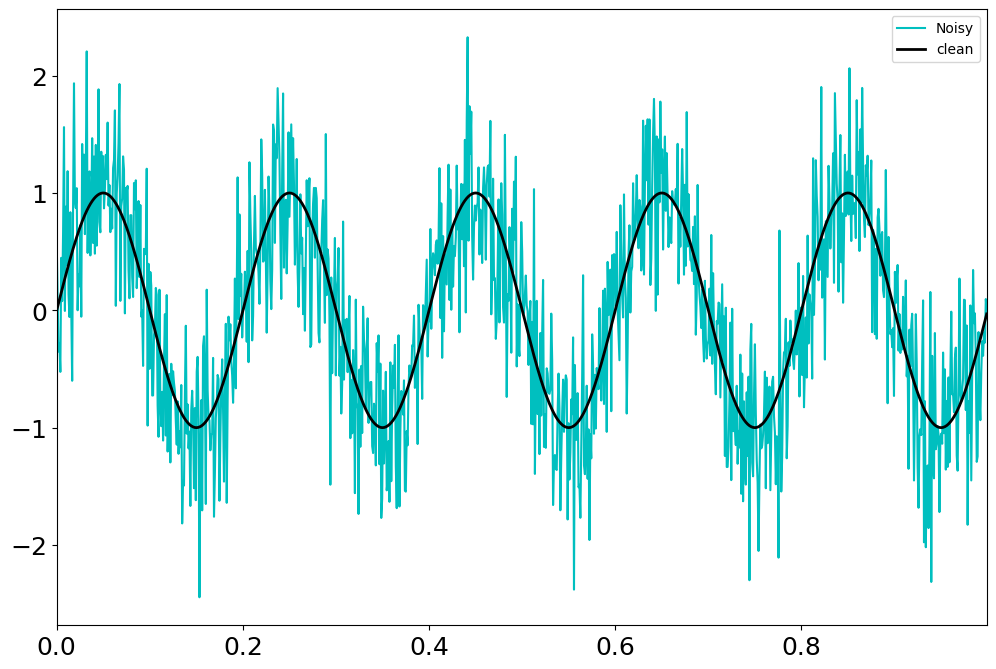

In [221]:
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 18})

noise_signal, original_signal,t = generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)

# ploting the Noisy signal
plt.plot(t,noise_signal,color='c',lw=1.5,label='Noisy')
plt.plot(t,original_signal,color='k',lw=2,label='clean')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

In [222]:
def IFFT(x):
    """
    Function to calculate the inverse Fast Fourier Transform (IFFT)
    of a 1D complex-valued signal x.

    Parameters:
    x (array_like): Input signal in the frequency domain (DFT coefficients).

    Returns:
    X (array): Inverse FFT of the input signal.
    """

    # Get the length of the input signal
    N = len(x)
    
    # Base case: if the length of the input signal is 1, return the signal itself
    if N == 1:
        return x
    else:
        # Divide the input signal into even and odd indices and recursively compute IFFT for each
        X_even = IFFT(x[::2])
        X_odd = IFFT(x[1::2])
        
        # Calculate the factors for the butterfly operations
        factor = np.exp(2j*np.pi*np.arange(N)/ N)
        
        # Combine the results of the even and odd indices using the butterfly operations
        X = np.concatenate( [X_even + factor[:int(N/2)] * X_odd, X_even + factor[int(N/2):] * X_odd])
        
        return X

c:\Users\Mouliprasanna\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Mouliprasanna\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


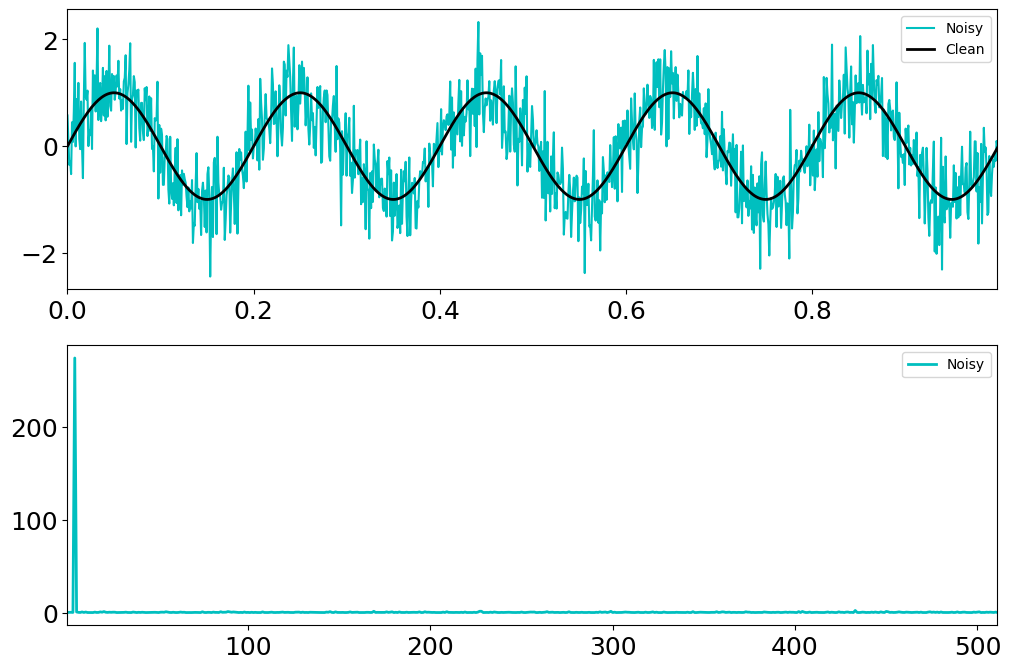

In [223]:
# Compute the length of the time array
n = len(t)

# Compute the time step (assuming num_samples represents the number of samples)
dt = 1 / num_samples

# Compute the Discrete Fourier Transform (DFT) of the noise signal
fhat = FFT(noise_signal)

# Compute the Power Spectral Density (PSD) using the DFT coefficients
PSD = fhat * np.conj(fhat) / n

# Compute the frequencies corresponding to the DFT coefficients
freq = (1 / (dt * n)) * np.arange(n)

# Define an array L containing the indices for the positive frequencies
L = np.arange(1, np.floor(n / 2), dtype='int')

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1)

# Set the current subplot to the first one
plt.sca(axs[0])

# Plot the noisy signal and the original clean signal
plt.plot(t, noise_signal, color='c', lw=1.5, label='Noisy')
plt.plot(t, original_signal, color='k', lw=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend(fontsize=10, loc='upper right')

# Set the current subplot to the second one
plt.sca(axs[1])

# Plot the Power Spectral Density (PSD) against positive frequencies of Nosiy signal
plt.plot(freq[L], PSD[L], color='c', lw=2, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend(fontsize=10, loc='upper right')
plt.show()


DENOISING THE GIVEN SIGNAL

In [224]:
# Determine indices where PSD values are greater than 150 (assumed threshold)
indicens = PSD > 150

# Multiply PSD by the indicator array to retain certain PSD values and eliminate noise
PSDClean = PSD * indicens

# Multiply the DFT coefficients by the indicator array to retain certain frequency components and eliminate noise
fhat = indicens * fhat 

# Compute the Inverse Fast Fourier Transform (IFFT) to obtain the filtered signal in the time domain
ffilt = IFFT(fhat)

# The filtered signal 'ffilt' is obtained using the Inverse Fast Fourier Transform.


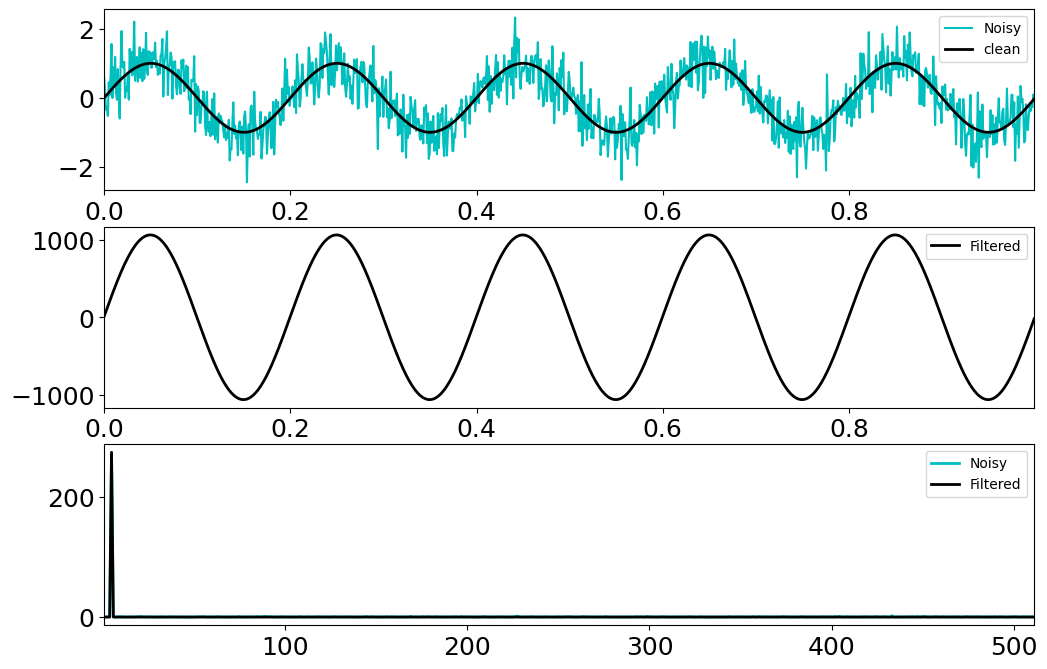

In [225]:
fig , axs = plt.subplots(3,1)

# ploting the Nosiy Signal
plt.sca(axs[0])
plt.plot(t,noise_signal,color='c',lw=1.5,label='Noisy')
plt.plot(t,original_signal,color='k',lw=2,label='clean')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

# ploting the filtered Signal
plt.sca(axs[1])
plt.plot(t,ffilt , color='k',lw=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

#ploting the PSD of filtered Signal
plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',lw=2,label='Noisy')
plt.plot(freq[L],PSDClean[L],color='k',lw=2,label='Filtered')
plt.xlim(L[0],L[-1])
plt.legend(fontsize=10, loc='upper right')

plt.show()

In [226]:
def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal ,t

In [227]:
def moving_average_filter(data, window_size):
    """
    Moving average filter for smoothing a 1D signal.

    Parameters:
    - data (array_like): Input signal to be filtered.
    - window_size (int): Size of the moving window.

    Returns:
    - filtered_data (array): Filtered signal.
    """
    # Initialize an empty list to store filtered values
    filtered_data = []
    
    # Iterate over the input signal
    for i in range(len(data)):
        # Calculate the starting and ending indices of the moving window
        start_idx = max(0, i - (window_size // 2))
        end_idx = min(len(data), i + (window_size // 2) + 1)
        
        # Extract the values within the moving window
        window_values = data[start_idx:end_idx]
        
        # Calculate the mean of the window values
        window_mean = sum(window_values) / len(window_values)
        
        # Append the mean to the filtered data list
        filtered_data.append(window_mean)
    
    return filtered_data


In [228]:
# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave

In [229]:
noise_signal ,t = generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)
widow_size = 10
filtered_data = moving_average_filter(noise_signal, widow_size)
print(len(noise_signal),len(t))

1000 1000


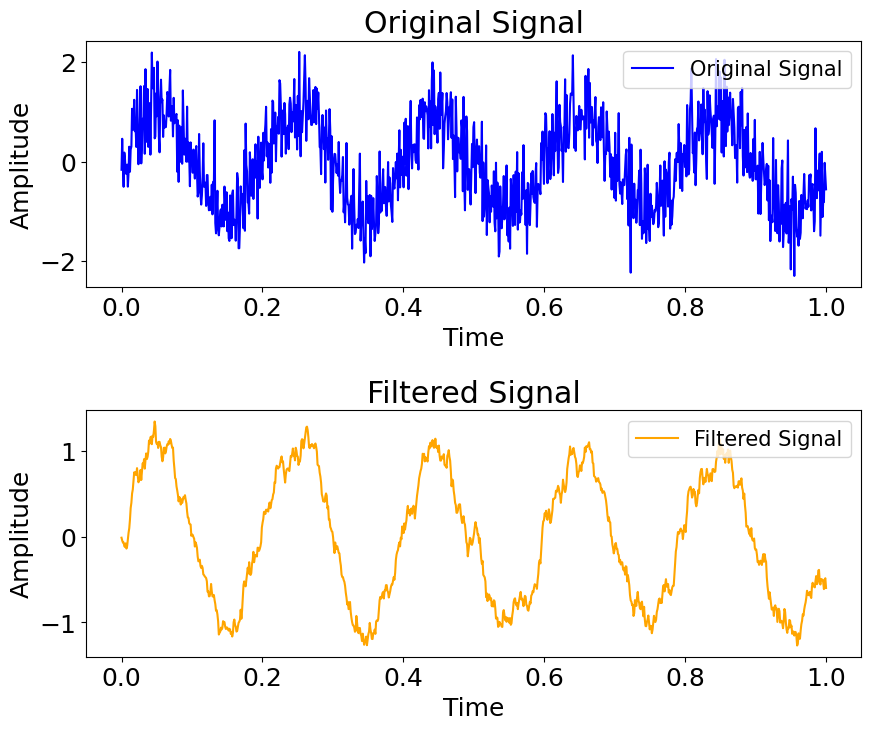

In [230]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot original signal
axs[0].plot(t, noise_signal, label='Original Signal', color='blue')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')

# Plot filtered signal
axs[1].plot(t, filtered_data, label='Filtered Signal', color='orange')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Filtered Signal')

# Add legends
axs[0].legend(fontsize=15, loc='upper right')
axs[1].legend(fontsize=15, loc='upper right')

plt.subplots_adjust(hspace=0.5)
plt.show()